In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
from pylab import rcParams
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
import pandas as pd
import time
import getpass

# Predefined credentials
USERNAME = "admin"
PASSWORD = "1234"

print("===== Insurance Fraud Detection System =====")

# Take user input
username_input = input("Enter Username: ")
password_input = getpass.getpass("Enter Password: ")

# Check credentials
if username_input == USERNAME and password_input == PASSWORD:
    print("\nLogin Successful!")
    print("Loading dataset, please wait...")
    
    # Loading animation
    for i in range(5):
        print(".", end="", flush=True)
        time.sleep(0.5)

    print("\n")

    # Load dataset
    df = pd.read_csv("insurance_claims.csv")
    print("Dataset Loaded Successfully!")
    print("Shape of dataset:", df.shape)

else:
    print("Invalid Username or Password")

===== Insurance Fraud Detection System =====


Enter Username:  admin
Enter Password:  ········



Login Successful!
Loading dataset, please wait...
.....

Dataset Loaded Successfully!
Shape of dataset: (1000, 40)


In [3]:
#Load the data 
df = pd.read_csv('insurance_claims.csv')
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,2015-01-02,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,2015-01-13,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,2015-02-27,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,2015-01-30,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,2011-07-25,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,2015-01-05,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [33]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [34]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [35]:
df.shape

(1000, 40)

In [36]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

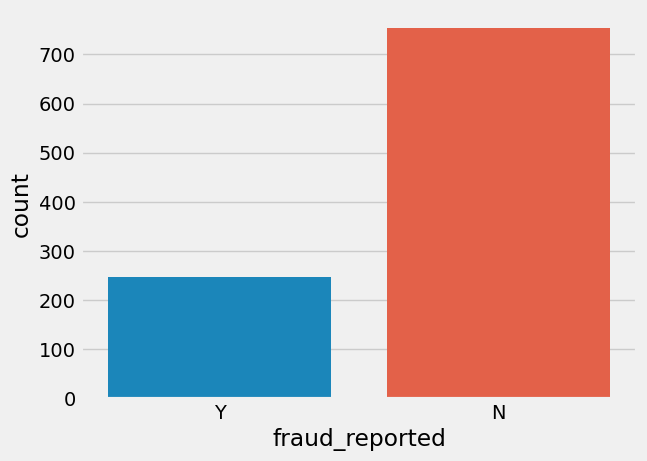

In [38]:
plt.style.use('fhivetirtyeight')
ax=sns.countplot(x='fraud_reported',data=df,hue='fraud_reported')

In [41]:
df.drop(columns=["policy_number", "insured_zip", "_c39"], inplace=True)

In [42]:
df["policy_bind_date"] = pd.to_datetime(df["policy_bind_date"])
df["incident_date"] = pd.to_datetime(df["incident_date"])

# Create new feature: policy duration
df["policy_duration_days"] = (df["incident_date"] - df["policy_bind_date"]).dt.days

# Drop original date columns
df.drop(columns=["policy_bind_date", "incident_date"], inplace=True)

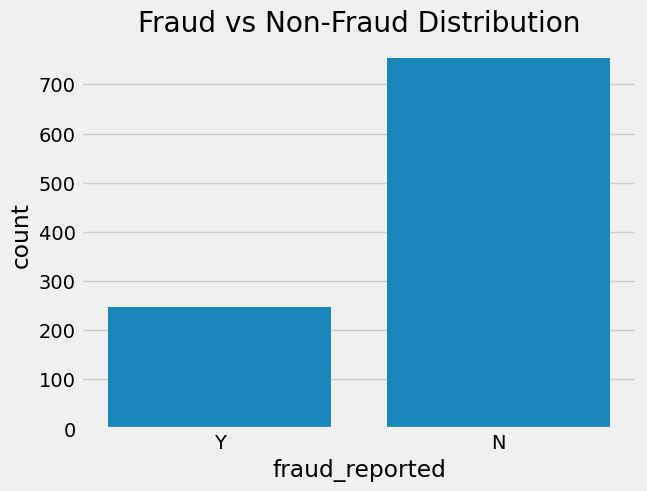

fraud_reported
N    0.753
Y    0.247
Name: proportion, dtype: float64

In [43]:
sns.countplot(x="fraud_reported", data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

df["fraud_reported"].value_counts(normalize=True)

In [53]:
#from adobe plot
df['fraud_reported'].value_counts()

fraud_reported
N    753
Y    247
Name: count, dtype: int64

In [52]:
df['incident_state'].value_counts()

incident_state
NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: count, dtype: int64

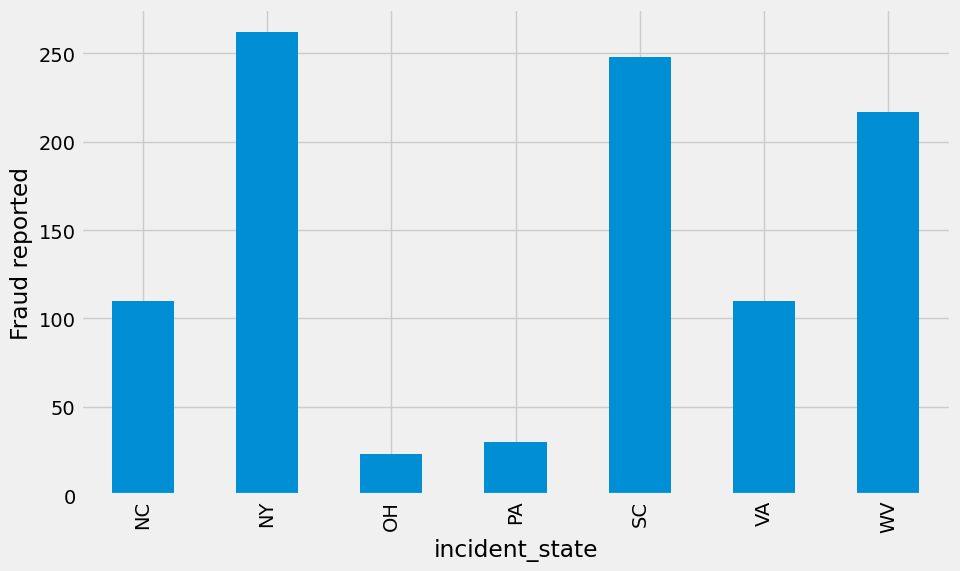

In [5]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax=df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

In [ ]:
plt.rcParmas['figure.figsize']=[15,8]
ax=plt.style.use('fivethirtyeight')
table=pd.crosstab(df.age,df.fraud_reported)
table.div(table